In [17]:
# Import libraries
import numpy as np
import cvxpy as cp
from itertools import product
import time
import matplotlib.pyplot as plt

In [2]:
def exact_form(xi_k, p_k):
    
    # Define number of distributions
    K = xi.shape[0]

    # Define number of atoms per sample
    N = xi.shape[1]
    
    # Dec Var
    mu = cp.Variable((K, N))
    lam = cp.Variable((K, 1))

    # Obj
    obj = cp.Maximize(-sum(sum(cp.multiply(mu, p_k))))

    # Cons
    cons = [lam >= 0]
    cons = [sum(lam) == 1]
    for alpha in product(*[range(len(xi[k])) for k in range(K)]):
        for xi_0 in xi_k.flatten():
            sum_lam = 0
            sum_mu = 0
            for k in range(K):
                sum_lam += lam[k]*cp.norm(xi_0 - xi[k, alpha[k]], 1)
                sum_mu += mu[k, alpha[k]]
            cons.append(sum_lam >= - sum_mu)
            #print(len(mu[:, alpha[0]]))
            #print(len(lam*cp.norm(xi_0 - xi[:, alpha[0]], 1)))

    # Solve program
    problem = cp.Problem(obj, cons)
    problem.solve(solver = cp.SCIPY, scipy_options={"method": "highs"})
    
    return obj.value

In [3]:
def two_app(xi_k, p_k):
    N_k = []
    K = len(p_k)
    c_k = []
    S = xi_k.flatten()
    N_s = len(S)
    
    
    for k in range(K):
        N_k.append(len(p_k[k]))
        
    for k in range(K):
        # Create cost matrix (l-1 norm used)
        c = np.zeros((N_s, N_k[k]))
        for i in range(len(S)):
            for j in range((N_k[k])):
                c[i, j] = np.abs(S[i] - xi_k[k, j]) # l-1 norm
        c_k.append(c)
    
    # Dec Var
    T = [cp.Variable((N_s, N_k[k])) for k in range(K)]
    epsilon = cp.Variable((1, 1))
    p = cp.Variable((N_s))

    # Obj
    obj = cp.Minimize(epsilon)

    cons = []

    # Cons
    for k in range(K):
        cons.append(T[k] >= 0)
        #cons.append(sum(sum(cp.multiply(T[k], c))) <= epsilon)
        cons.append(cp.trace(c_k[k].T@T[k]) <= epsilon)
        cons.append(T[k]@np.ones(N_k[k]) == p)
        cons.append(T[k].T@np.ones(N_s) == p_k[k])

    # Solve program
    problem = cp.Problem(obj, cons)
    problem.solve(solver = cp.SCIPY, scipy_options={"method": "highs"})
    
    return obj.value

In [87]:
# Read data (FOR NOW GENERATE PSEUDO RANDOM NORMAL SEQUENCE)
K_max = 7
N = 3
time_exact = []
time_approx = []
result_ex = []
result_ap = []
for K in range(2, K_max):
    xi = np.random.normal(size = (K, N))

    # Define probability matrix
    p_k = (1/N)*np.ones((K, N))

    start = time.time()
    result_ex.append(exact_form(xi, p_k))
    end = time.time()
    time_exact.append(end-start)

    start = time.time()
    result_ap.append(two_app(xi, p_k))
    end = time.time()
    time_approx.append(end-start)


In [88]:
print(time_exact, time_approx)

[0.13428020477294922, 0.7476344108581543, 3.3226208686828613, 13.573973178863525, 68.85185289382935] [0.010019540786743164, 0.022248268127441406, 0.015466690063476562, 0.019191980361938477, 0.02977919578552246]


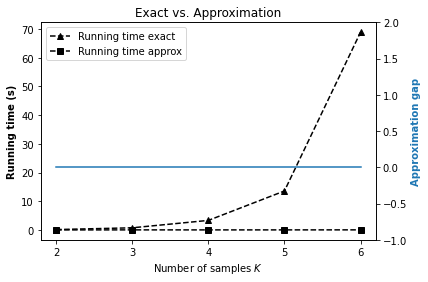

In [91]:
fig, ax1 = plt.subplots(figsize = (6,4))

ax1.plot(range(2, K_max), time_exact, '^--', color = 'k', label = 'Running time exact')
ax1.plot(range(2,K_max), time_approx, 's--', color = 'k', label = 'Running time approx')
#ax1.set_yscale('log')
ax2 = ax1.twinx()
ax2.plot(range(2,K_max), 1 - np.divide(result_ap, result_ex), label='Approximation gap')
ax2.set_ylim([-1, 2])
ax1.set_xlabel('Number of samples $K$')
ax1.set_ylabel('Running time (s)', color='k', weight="bold")
ax2.set_ylabel('Approximation gap', color='tab:blue', weight="bold")

ax1.legend()
#ax2.legend()

plt.locator_params(axis='x', nbins = K_max-2)
plt.title('Exact vs. Approximation')

plt.savefig('approx.pdf')

In [7]:
K = 100000

results = []
for k in range(K):
    a = np.sort(np.random.rand(2))
    segment = np.sort(np.array([a[0], a[1]-a[0], 1-a[1]]))

    results.append(int(segment[0] + segment[1] >= segment[2]))
    
sum(results)/K    

0.25208

In [21]:
.2*((24**4)/60)/60

18.432000000000002